# Data Pipeline — Brent Price Series

This notebook performs the initial data ingestion and sanity checks for the project.

Scope:
- Load monthly Brent price data (2000–2024)
- Clean and validate the time series
- Perform basic exploratory checks (no modeling)

This notebook does **not** estimate models or generate scenarios.
It only ensures that the input data are reliable and interpretable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [8]:
# Path to data
DATA_PATH = "../data/raw/brent.csv"

# Load CSV with correct separator
df = pd.read_csv(DATA_PATH, sep=";")

# Preview
df.head()
df.columns

Index(['Date', 'price'], dtype='object')

In [7]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by time (important)
df = df.sort_values("Date").reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    300 non-null    datetime64[ns]
 1   price   300 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [9]:
# Basic descriptive statistics
df["price"].describe()


count    300.000000
mean      66.935957
std       28.554253
min       18.681429
25%       44.143571
50%       65.270996
75%       85.010162
max      133.585217
Name: price, dtype: float64

In [10]:
# Check missing values
df.isna().sum()


Date     0
price    0
dtype: int64

In [11]:
# Check duplicated dates
df["Date"].duplicated().sum()


np.int64(0)

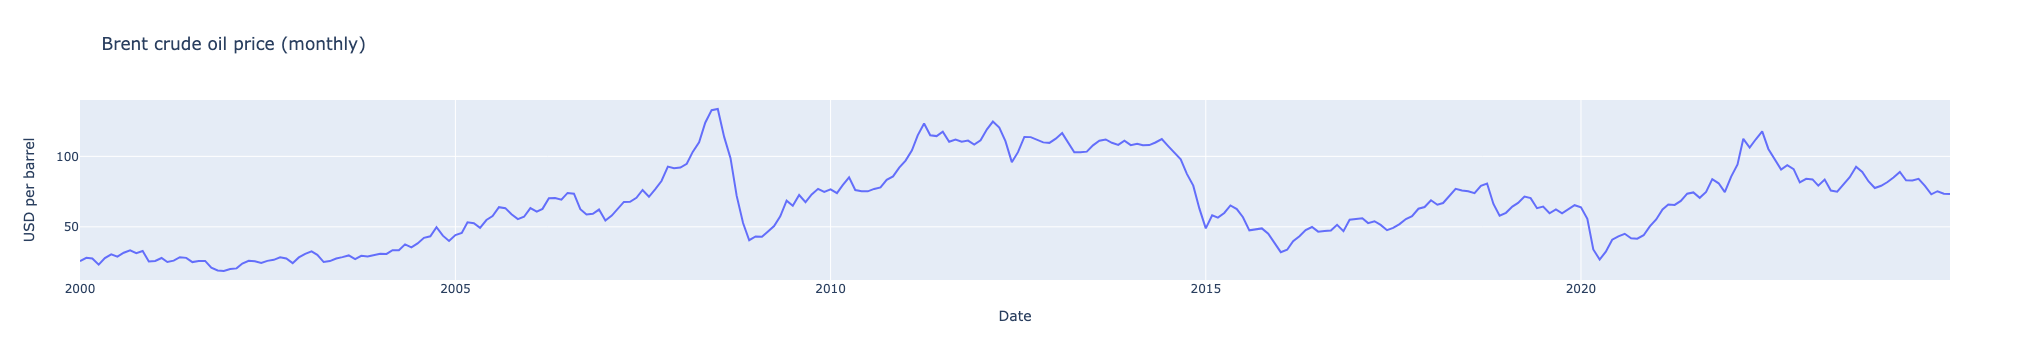

In [24]:
import plotly.express as px

fig = px.line(
    df,
    x="Date",
    y="price",
    title="Brent crude oil price (monthly)",
    labels={"price": "USD per barrel"}
)

fig.show()


In [13]:
# Log returns (diagnostic only)
df["log_return"] = np.log(df["price"]).diff()

df["log_return"].describe()


count    299.000000
mean       0.003511
std        0.091532
min       -0.495010
25%       -0.046615
50%        0.017466
75%        0.066615
max        0.231314
Name: log_return, dtype: float64

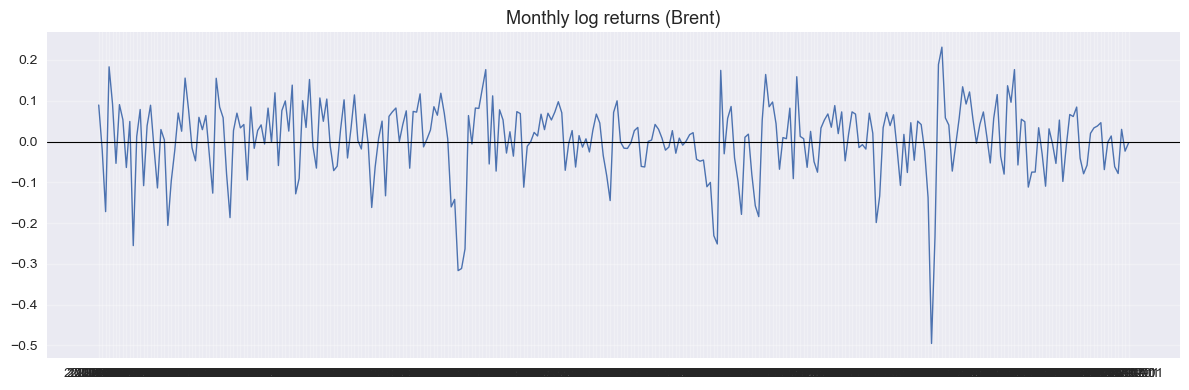

In [19]:
import matplotlib.pyplot as plt

# Create aligned date series for log-returns
df_lr = df.iloc[1:].copy()

plt.figure(figsize=(12,4))
plt.plot(df_lr["Date"], df_lr["log_return"], linewidth=1)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Monthly log returns (Brent)", fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Keep only what is needed for scenario analysis
df_clean = df[["Date", "price"]].copy()

# Save clean dataset
OUTPUT_PATH = "../data/processed/brent_clean_monthly.csv"
df_clean.to_csv(OUTPUT_PATH, index=False)

print(f"Clean dataset saved to {OUTPUT_PATH}")


Clean dataset saved to ../data/processed/brent_clean_monthly.csv
